In [5]:
# Data Handling Libraries
import pandas as pd
import numpy as np

from sklearn.decomposition import NMF # Non-negative Matrix Factorization
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("spotify.xls", index_col=0)
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [7]:
x = df.values

In [8]:
nmf = NMF(n_components=100, random_state=200)
nmf.fit(x)


C:\Users\marga\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\marga\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(n_components=100, random_state=200)

In [9]:
user_matrix = nmf.transform(x)

C:\Users\marga\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [10]:
user_matrix

array([[0.        , 0.        , 1.37436262, ..., 0.        , 0.        ,
        0.        ],
       [0.79174493, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.41081375, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.1750327 ],
       [0.        , 3.37343424, 0.67907102, ..., 0.        , 0.        ,
        0.67097795],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.64072164]])

In [11]:
song_matrix = nmf.components_.T

In [12]:
song_matrix

array([[0.13099188, 0.26396419, 0.36500396, ..., 0.        , 0.        ,
        0.03992991],
       [0.28969775, 0.        , 0.02191636, ..., 0.01523965, 0.2709958 ,
        0.11459352],
       [0.        , 0.15651416, 0.01563097, ..., 0.13446851, 0.09786875,
        0.05432452],
       ...,
       [0.27916476, 0.36588488, 0.        , ..., 0.07748177, 0.05500395,
        0.18392522],
       [0.54143777, 0.15390772, 0.13017165, ..., 0.05047963, 0.        ,
        0.30028493],
       [0.34672694, 0.17403204, 0.08278889, ..., 0.0495085 , 0.20417414,
        0.35740174]])

# Building a Recommendation System 

# Recommendation System 1


In [13]:
# 1. In this method we will use the user matrix to build the recommendation.

# Steps
# 1. Consider recommending songs to user 1 who is located at row location zero
# 2. In order to do this we need to find the Euclidian distance between user 1 and remaining 999 users.
# 3. After finding the distance we will pickup 5 closest users to user 1.
# 4. We will recommend the songs heard by these 5 closest users to user 1.

In [14]:
def calc_dist(user1, user2):
    return pow(sum([pow(user1[x] - user2[x], 2) for x in range(len(user1))]), 0.5)


In [15]:
calc_dist(user_matrix[0], user_matrix[1])

13.024335464791392

In [20]:
def dist_all_user(base_user, user_matrix):
    
    distance = []
    for i in range(len(user_matrix)):
        if base_user != 1:
            distance.append(calc_dist(user_matrix[base_user], user_matrix[i]))
            
            
    return distance

In [21]:
distance_0 = dist_all_user(0,user_matrix)
distance_0

[0.0,
 13.024335464791392,
 13.43034993814982,
 12.667895157608305,
 14.203417696079123,
 12.840364282414725,
 10.761953699188286,
 11.253480510001246,
 13.62322543847175,
 12.644286385103312,
 13.017255461781579,
 12.317086664288885,
 12.100451151774644,
 10.484076522988948,
 13.644092480955237,
 12.39149367388021,
 13.07949873591488,
 13.967505075083986,
 14.672787693775117,
 11.306753894309054,
 11.734607637831202,
 14.380973232362916,
 13.245318308662076,
 13.234693141998607,
 15.205673492250144,
 14.108438218574435,
 13.990602085106014,
 12.827520628525784,
 13.63087638361889,
 12.534209526059765,
 12.869201975044593,
 12.93434451156828,
 13.554169043555683,
 13.554046123195796,
 12.381222591087154,
 13.264048322309476,
 12.846216664606015,
 13.174223689392095,
 15.171954647591372,
 13.589501359408443,
 11.246460196523232,
 13.155830567061498,
 13.615729765010158,
 10.839970368382762,
 11.648774181185539,
 13.522029422203856,
 13.643691785194537,
 12.535675965739923,
 12.334688865

In [22]:
np.sort(distance_0)

array([ 0.        , 10.22796548, 10.40182959, 10.41740569, 10.46523753,
       10.47347734, 10.48407652, 10.71311743, 10.71826868, 10.71932398,
       10.72079635, 10.73140059, 10.75439218, 10.7619537 , 10.77120327,
       10.80605548, 10.81531873, 10.82970453, 10.83997037, 10.88430218,
       10.91857414, 10.92473555, 10.97932167, 11.00788068, 11.01053683,
       11.01056629, 11.0679343 , 11.08287928, 11.10561317, 11.1539721 ,
       11.1583452 , 11.17514348, 11.21341206, 11.21899468, 11.22831476,
       11.23057818, 11.23587356, 11.2464602 , 11.25348051, 11.25725102,
       11.26375336, 11.2740966 , 11.28208371, 11.294991  , 11.30675389,
       11.31349125, 11.31463243, 11.32693256, 11.32902132, 11.33779307,
       11.34749145, 11.36088377, 11.38829172, 11.39548477, 11.40654897,
       11.42793972, 11.4282507 , 11.44840581, 11.44893318, 11.45497385,
       11.46332062, 11.46527985, 11.47209967, 11.47332375, 11.5046393 ,
       11.50853422, 11.50887637, 11.51655174, 11.51987148, 11.52

In [23]:
np.argsort(distance_0)

array([  0, 562, 895, 774, 183, 332,  13, 605, 122, 242, 788, 196, 760,
         6, 139, 463, 897, 284,  43, 766, 227, 682, 738, 802, 629, 883,
       318, 903, 909, 442, 457, 717, 138, 648, 489,  76, 354,  40,   7,
        99, 151, 313, 307, 885,  19, 445, 179, 914, 286, 484, 528, 804,
       638, 628, 779, 199,  88, 886, 678, 411, 161, 870, 973, 758, 412,
       941, 447, 737, 237, 167, 394, 306, 957, 792, 209, 367, 541, 644,
       180, 948, 582, 864, 218, 292, 932, 968, 896, 399,  44, 215, 772,
       113, 789,  72, 304, 424, 587, 504, 147, 630,  20, 733, 153, 704,
       369, 939, 748, 223, 981, 382, 977, 295, 130, 386, 431, 241, 316,
       956, 580, 460, 288, 681, 208, 137, 982, 725, 688, 915, 987, 289,
       702, 627, 844, 156, 650, 187, 326, 492, 417, 500, 962, 291, 712,
       172, 747, 502, 336, 950, 176, 534,  77, 337, 755, 669, 991, 352,
       213, 197, 806, 128, 347, 793, 314, 995, 419, 960, 666, 949, 721,
       612, 296, 594, 841, 426, 825, 251, 794, 519,  70,  12, 37

In [24]:
closest_users = np.argsort(distance_0)[0:5]
closest_users

array([  0, 562, 895, 774, 183], dtype=int64)

In [25]:
for i in closest_users:
    print("Songs heard by", i, "are ")
    temp = pd.DataFrame(df.iloc[i+1])
    print(temp[temp.values != 0].index)

Songs heard by 0 are 
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4990', 'song_4991', 'song_4992', 'song_4993', 'song_4994',
       'song_4995', 'song_4996', 'song_4997', 'song_4998', 'song_4999'],
      dtype='object', length=4672)
Songs heard by 562 are 
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4989', 'song_4990', 'song_4991', 'song_4992', 'song_4993',
       'song_4995', 'song_4996', 'song_4997', 'song_4999', 'song_5000'],
      dtype='object', length=4682)
Songs heard by 895 are 
Index(['song_1', 'song_2', 'song_3', 'song_5', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4989', 'song_4991', 'song_4992', 'song_4993', 'song_4994',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4672)
Songs heard

In [26]:
def recommend_songs(closest_users, df, no_of_songs):
    
    # picking out songs heard by the closest users
    temp = df.iloc[closest_users]
    
    #making a dictionary of songs heard maximum time by the closest users
    max_heard = temp.max().to_dict()
    
    # sorting the dictionary in the descending order such that the songs heard maximum time can be recommended
    sorted_dictionary = sorted(max_heard.items(), key=lambda keyvalue : (keyvalue[1],keyvalue[0]), reverse=True)[0:no_of_songs]
    
    return  [x[0] for x in sorted_dictionary]

In [27]:
print("Songs to be recommended to user 1 are", recommend_songs(closest_users,df,5))

Songs to be recommended to user 1 are ['song_997', 'song_993', 'song_990', 'song_989', 'song_986']


# Recommendation system 2 :

In [28]:

# 1. In this method we will use the song matrix to build recommendation.

# Steps:
# 1. First we will build clusters on the song matrix.
# 2. Then we will consider any user listening to a particular song. Eg Song 5
# 3. We will try to figure out in which particular cluster is song 5 present.
# 4. After that we will try to find out songs which are very close to song 5 in that particular cluster.
# 5. We will recommend those songs to users.

In [29]:
wcss = {} # within cluster sum of squares
for k in range(1,50):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(song_matrix)
    wcss[k] = kmeans.inertia_

In [30]:
wcss

{1: 14283.617976530875,
 2: 14120.50470225819,
 3: 13996.738030413871,
 4: 13905.885470160305,
 5: 13828.24153475937,
 6: 13765.130343077606,
 7: 13702.537309158859,
 8: 13651.152568801243,
 9: 13605.455593099548,
 10: 13561.196551894016,
 11: 13521.36428839657,
 12: 13483.532196975078,
 13: 13456.897289607012,
 14: 13432.444841673927,
 15: 13406.411158623596,
 16: 13377.332874131209,
 17: 13360.709802313035,
 18: 13310.506471259681,
 19: 13316.434238716092,
 20: 13293.510541523798,
 21: 13270.17089568017,
 22: 13243.047767411837,
 23: 13235.972301733515,
 24: 13209.965377781418,
 25: 13204.309527199017,
 26: 13187.447902474638,
 27: 13161.67051298972,
 28: 13156.209876097155,
 29: 13144.329207905843,
 30: 13114.062262303301,
 31: 13116.542873753137,
 32: 13106.40409671709,
 33: 13088.277388785698,
 34: 13068.084117867473,
 35: 13063.95783936651,
 36: 13050.233820961805,
 37: 13031.494645180883,
 38: 13020.394036388401,
 39: 13014.239062574607,
 40: 12998.71172580609,
 41: 12997.949836

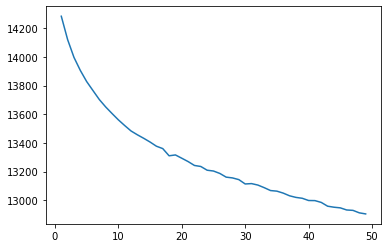

In [31]:
plt.plot(wcss.keys(), wcss.values())

In [32]:
def recommend_songs(df, n_cluster, song_matrix, song_name, no_of_songs):
    
    # Making clusters of the songs
    kmeans = KMeans(n_clusters=n_cluster, max_iter=100).fit(song_matrix)
    
    # finding position of the song
    index_of_song = df.columns.to_list().index(song_name)
    
    # Picking up the genre values of the song
    song_vector = song_matrix[index_of_song]
    
    # Assigning distinct cluster numbers to the song
    all_song_in_cluster = list(kmeans.predict(song_matrix))
    
    # Finding out in which other songs are present in the same cluster in which our song is residing
    song_cluster = [x for x in range(len(all_song_in_cluster)) if all_song_in_cluster[x] == kmeans.predict([song_vector])]
    
    # Song genre values of the songs present in the same cluster from the song matrix
    song_numbers = song_matrix[song_cluster]
    
    # Finding out the nearest songs using nearest neighbor algorithm
    nn = NearestNeighbors(n_neighbors=no_of_songs)
    nn.fit(song_numbers)
    
    # Picking out the nearest songs
    recommend_songs = nn.kneighbors([song_matrix[index_of_song]])
    
    # Making a list of all songs
    song_list = df.columns
    
    return [song_list[x] for x in recommend_songs[1][0]]

In [33]:
recommend_songs(df, 12, song_matrix, "song_5", 5)

['song_1', 'song_314', 'song_304', 'song_303', 'song_48']